In [187]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.rdMolDescriptors import CalcMolFormula, CalcNumRings

In [77]:
def get_mol_weight(smi: str) -> float:
    mol = Chem.MolFromSmiles(smi, sanitize=False)
    mol.UpdatePropertyCache(strict=False)
    return MolWt(mol)


def get_formula(smi: str) -> str:
    mol = Chem.MolFromSmiles(smi, sanitize=False)
    mol.UpdatePropertyCache(strict=False)
    return CalcMolFormula(mol)


def count_rings(smi: str) -> int:
    mol = Chem.MolFromSmiles(smi, sanitize=False)
    mol.UpdatePropertyCache(strict=False)
    Chem.FastFindRings(mol)
    return CalcNumRings(mol)


def count_heavies(formula: str) -> int:
    counter = 0
    for element in ["N", "O", "Si", "P", "S"]:
        search = re.findall(element + r"\d{0,2}", formula)
        if len(search) != 0:
            item = search.pop()
            item = item.replace(element, "")
            if len(item) == 0:
                counter += 1
            else:
                # convert the number of atoms into an integer
                counter += int(item)
    return counter


def has_substructure(smi: str, match: str) -> bool:
    substruct = Chem.MolFromSmiles(match)
    mol = Chem.MolFromSmiles(smi, sanitize=False)
    mol.UpdatePropertyCache(strict=False)
    return mol.HasSubstructMatch(substruct)


def is_hydrocarbon(smi: str) -> bool:
    smi = [character for character in smi if character.isalpha()]
    elements = list(set(smi))
    if len(elements) == 1 and elements[0] == "C":
        return True
    return False

In [2]:
df = pd.read_csv("../../scripts/tmc1_recommendations.csv")

In [9]:
df["weight"] = df["recommendation"].apply(get_mol_weight)

In [19]:
df["is_cyanide"] = df["recommendation"].apply(has_substructure, args=("C#N",))

In [21]:
df["is_hydrocarbon"] = df["recommendation"].apply(is_hydrocarbon)

In [23]:
df["is_hydrocarbon"].sum()

184

In [24]:
df["is_cyanide"].sum()

644

In [87]:
df["Anchor rings"] = df["anchor"].apply(count_rings)

In [28]:
df["formula"] = df["recommendation"].apply(get_formula)

In [36]:
df["Rings"] = df["recommendation"].apply(count_rings)

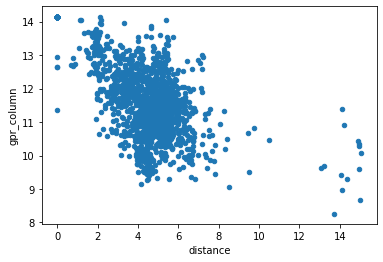

In [47]:
df.plot(x="distance", y="gpr_column", kind="scatter")

In [86]:
df.loc[df["anchor"] == "N#CC1=CC2=CC=CC=C2C=C1"].head(30)

,entry,recommendation,anchor,distance,gpr_column,uncertainty,weight,is_cyanide,is_hydrocarbon,formula,Rings,num_heavy
1113,2353084,N#CC1=CC=CC2=CC=CC=C12,N#CC1=CC2=CC=CC=C2C=C1,1.985124,11.857764,0.132222,153.184,True,False,C11H7N,2,1
1114,2206835,N#CC1=CC2=C(C=C1)N=CC=C2,N#CC1=CC2=CC=CC=C2C=C1,3.818286,10.577469,1.322213,154.172,True,False,C10H6N2,2,1
1115,1787065,CC1=CC(C2=CC=C(C#N)C=C2)=CC=C1,N#CC1=CC2=CC=CC=C2C=C1,3.938116,9.756751,1.274574,193.249,True,False,C14H11N,2,1
1116,1913283,CC1=CC=C(C2=CC=CC(C#N)=C2)C=C1,N#CC1=CC2=CC=CC=C2C=C1,3.938116,9.756750,1.274574,193.249,True,False,C14H11N,2,1
1117,1649012,CC1=CC=C(C2=CC=C(C#N)C=C2)C=C1,N#CC1=CC2=CC=CC=C2C=C1,3.988408,9.732279,1.282656,193.249,True,False,C14H11N,2,1
1118,1693458,CC1=CC(C2=CC=CC(C#N)=C2)=CC=C1,N#CC1=CC2=CC=CC=C2C=C1,3.997482,9.776814,1.281583,193.249,True,False,C14H11N,2,1
1119,2597637,CC1=CC=C(C2=CC=C(C#N)O2)C=C1,N#CC1=CC2=CC=CC=C2C=C1,4.244608,9.925226,1.340067,183.210,True,False,C12H9NO,2,3
1120,2000710,N#CC1=CC2=C(C=C1)C1=CC=CC=C1C2,N#CC1=CC2=CC=CC=C2C=C1,4.260505,9.928721,1.251738,191.233,True,False,C14H9N,3,1
1121,2534610,N#CC1=CC=C(C2=CN=CO2)C=C1,N#CC1=CC2=CC=CC=C2C=C1,4.347335,10.478544,1.379761,170.171,True,False,C10H6N2O,2,3
1122,2368695,N#CC1=CC=C(C2=CC=C(O)C=C2)C=C1,N#CC1=CC2=CC=CC=C2C=C1,4.362415,9.620834,1.331403,195.221,True,False,C13H9NO,2,2


In [85]:
df.loc[df["anchor"] == "C1=Cc2ccccc2C1"].head(30)

,entry,recommendation,anchor,distance,gpr_column,uncertainty,weight,is_cyanide,is_hydrocarbon,formula,Rings,num_heavy
1387,23430,C1=CC2:C:C:C:C:C:2C1,C1=Cc2ccccc2C1,0.000000,12.948580,0.132783,116.163,False,True,C9H8,2,0
1388,3313721,[CH]1C=CCc2ccccc21,C1=Cc2ccccc2C1,1.965560,11.703814,1.042927,129.182,False,False,C10H9,2,0
1389,284971,C1=Cc2ccccc2PC1,C1=Cc2ccccc2C1,2.101911,11.667976,1.020464,148.145,False,False,C9H9P,2,1
1390,1323962,C1=Cc2ccccc2CC1,C1=Cc2ccccc2C1,2.269653,10.780433,1.107119,130.190,False,False,C10H10,2,0
1391,3313719,[CH]1C[CH]c2ccccc21,C1=Cc2ccccc2C1,2.658592,11.695887,1.230877,116.163,False,False,C9H8,2,0
1392,1324560,Cc1cccc2c1CC=C2,C1=Cc2ccccc2C1,2.887251,10.677337,1.206939,130.190,False,False,C10H10,2,0
1393,236146,C1=Cc2ccccc21,C1=Cc2ccccc2C1,2.910769,12.015426,1.148534,102.136,False,False,C8H6,2,0
1394,284118,C1=CCc2ccccc2C1,C1=Cc2ccccc2C1,2.910769,11.056919,1.240338,130.190,False,False,C10H10,2,0
1395,1327005,Cc1cccc2c1C=CC2,C1=Cc2ccccc2C1,2.925520,10.776705,1.220061,130.190,False,False,C10H10,2,0
1396,3313720,[CH]1CC=Cc2ccccc21,C1=Cc2ccccc2C1,3.010493,11.312499,1.256050,129.182,False,False,C10H9,2,0


In [79]:
df["num_heavy"] = df["recommendation"].apply(count_heavies)

In [81]:
df["num_heavy"].mean()

1.1187790311877903

In [84]:
df["weight"].mean()

91.98466184944392

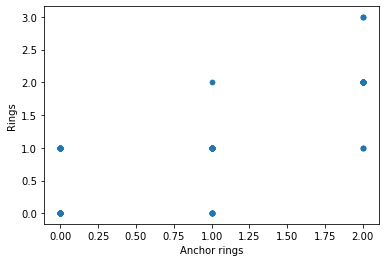

In [88]:
df.plot(x="Anchor rings", y="Rings", kind="scatter")

In [96]:
df.groupby(["Anchor rings", "Rings"])["entry"].count()

Anchor rings  Rings
0             0        1081
              1          27
1             0          13
              1         203
              2           2
2             1           5
              2         171
              3           5
Name: entry, dtype: int64

In [128]:
cov_mat = np.load("../../scripts/tmc1_recommendations_cov.npy")

# set the diagonal elements to zero to not influence statistics
cov_mat[np.eye(cov_mat.shape[0], dtype=bool)] = 0.

In [129]:
mean_vals = np.mean(cov_mat[87:,87:], axis=1)

In [130]:
np.argsort(mean_vals)

array([329, 338, 364, ..., 901, 894, 911])

In [131]:
mean_vals[911]

0.22667303772873368

In [115]:
sorted_indices = np.argsort(cov_mat, axis=1)

In [117]:
sorted_indices

array([[ 989, 1318,  976, ...,  137,    0,  231],
       [1334, 1336, 1335, ...,  160,  142,    1],
       [1363,  728,  743, ...,  137,  125,    2],
       ...,
       [1209,  495, 1483, ..., 1299, 1300, 1591],
       [ 416,  443, 1503, ..., 1282, 1288, 1592],
       [1055, 1131,  416, ..., 1572, 1573, 1593]])

In [143]:
indices = df.loc[df["anchor"] == "N#CC1=CC=CC=C1"].index

In [147]:
selected_rows = cov_mat[indices + 87]

In [166]:
sorted_indices = np.argsort(selected_rows, axis=1)

In [193]:
select = df.loc[df["anchor"] == "C1=Cc2ccccc2C1"].sort_values(["gpr_column", "distance"], ascending=False)

In [195]:
molecules = select["recommendation"].apply(Chem.MolFromSmiles).tolist()

In [200]:
annotations = list()
for index, row in select.iterrows():
    annotations.append(f"log N: {row.gpr_column:.3f}, D: {row.distance:.2f}")

In [202]:
fig = MolsToGridImage(molecules[2:], molsPerRow=12, legends=annotations[2:])

In [207]:
fig.save("indene_recs.png")

In [217]:
select = df.loc[df["anchor"] == "N#CC1=CC=CC2=CC=CC=C12"].sort_values(["gpr_column", "distance"], ascending=False)

In [218]:
annotations = list()
for index, row in select.iterrows():
    annotations.append(f"log N: {row.gpr_column:.3f}, D: {row.distance:.2f}")

In [219]:
molecules = select["recommendation"].apply(Chem.MolFromSmiles).tolist()

In [220]:
fig = MolsToGridImage(molecules, molsPerRow=12, legends=annotations)

In [223]:
fig.save("1-cyanonaphthalene-recs.png")

In [224]:
select = df.loc[df["anchor"] == "N#CC1=CC=CC1"].sort_values(["gpr_column", "distance"], ascending=False)

In [225]:
annotations = list()
for index, row in select.iterrows():
    annotations.append(f"log N: {row.gpr_column:.3f}, D: {row.distance:.2f}")

In [226]:
molecules = select["recommendation"].apply(Chem.MolFromSmiles).tolist()

In [227]:
fig = MolsToGridImage(molecules, molsPerRow=12, legends=annotations)

In [229]:
fig.save("1-cyanocyclopentadiene_recs.png")

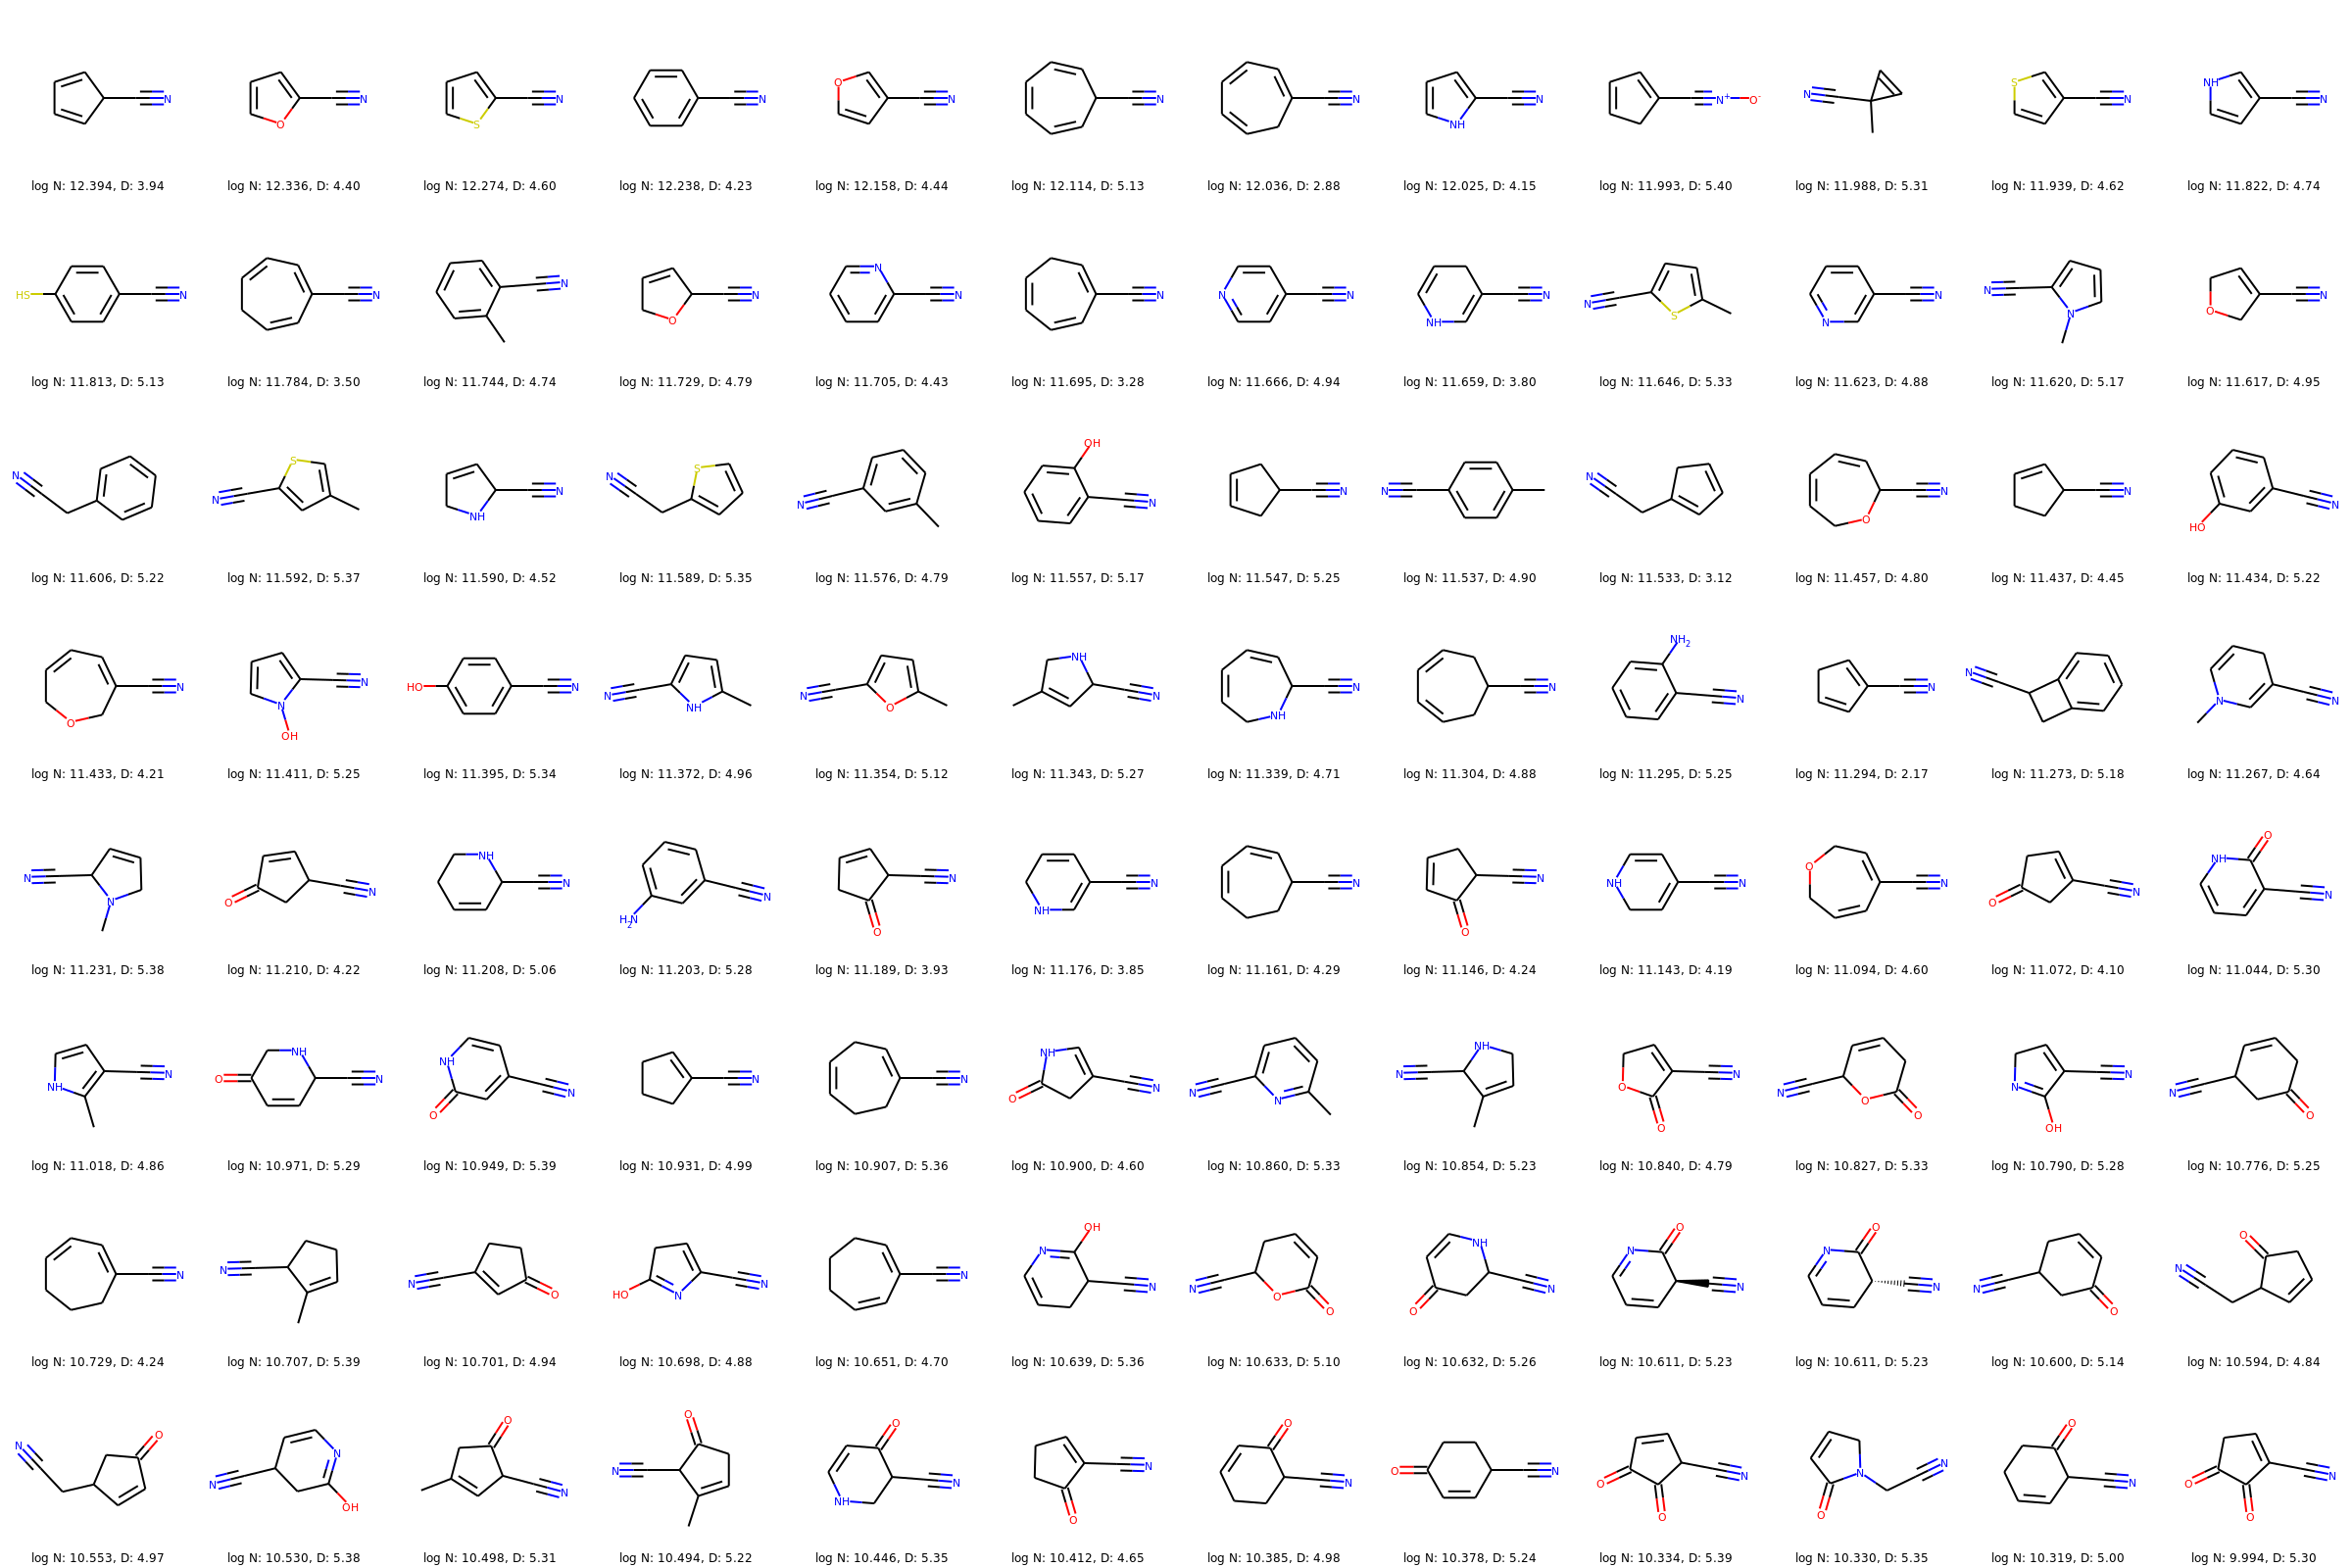

In [230]:
fig